# USE OF MACHINE LEARNING ALGORITHM

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import keras
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")


In [572]:
final = pd.read_csv("D:/mirge/datawarehouse/finaldfdata.csv")
print(final.shape)
final.head()

(826, 24)


,day,holiday,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,...,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,housecount,TotEnergyPerDay,AvgEnergyPerDay,month,date
0,2011-11-23,0,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,8.06,...,8.24,3.81,10.36,2.18,0.94,13,90.385000,6.952692,11,23
1,2011-11-24,0,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,...,9.71,8.56,12.93,7.01,0.97,25,213.412000,8.536480,11,24
2,2011-11-25,0,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,...,7.01,7.46,12.27,4.84,0.01,32,303.993000,9.499781,11,25
3,2011-11-26,1,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,...,11.59,7.01,12.96,4.69,0.05,41,420.976000,10.267707,11,26
4,2011-11-27,1,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,...,1.31,4.47,13.54,2.94,0.08,41,444.883001,10.850805,11,27


In [573]:
final.tail()

,day,holiday,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,...,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,housecount,TotEnergyPerDay,AvgEnergyPerDay,month,date
821,2014-02-24,0,14.23,183.0,6.03,0.50,5.02,1005.19,14.23,13.00,...,8.25,7.99,14.23,5.52,0.82,4994,51994.546994,10.411403,2,24
822,2014-02-25,0,11.43,202.0,5.06,0.62,5.69,1000.65,10.31,12.09,...,4.17,6.79,10.31,3.89,0.86,4995,51423.507990,10.294997,2,25
823,2014-02-26,0,11.29,227.0,2.74,0.26,3.82,1012.73,11.29,13.00,...,6.01,4.17,11.29,1.67,0.90,4993,50943.305998,10.202945,2,26
824,2014-02-27,0,10.31,224.0,3.08,0.32,4.14,1007.02,10.31,12.04,...,3.43,3.93,10.31,1.41,0.93,4990,51678.185994,10.356350,2,27
825,2014-02-28,0,7.35,61.0,3.11,0.67,2.24,998.92,4.51,10.80,...,3.05,3.43,7.35,0.82,0.97,4987,51310.745996,10.288900,2,28


In [574]:
final.rename(columns = {"AvgEnergyPerDay":"avg_energy"}, inplace=True)

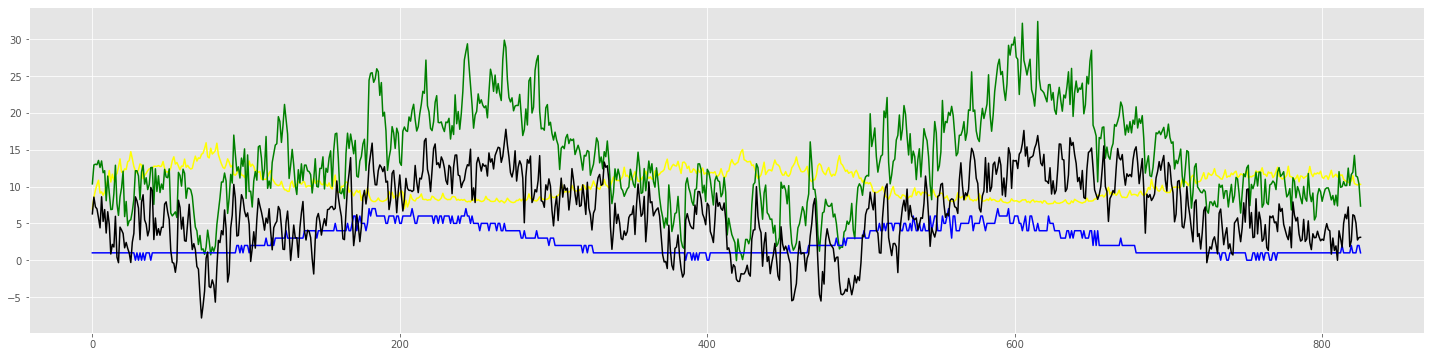

In [575]:
fig, ax1 = plt.subplots(figsize=(25, 6))
ax1.plot( final["avg_energy"], color="yellow")
ax1.plot( final["temperatureMax"],  color="green")
ax1.plot(final["uvIndex"], color="blue")
ax1.plot(final["dewPoint"], "black")
plt.show()

In [576]:
final.corr()

,holiday,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,...,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,housecount,TotEnergyPerDay,avg_energy,month,date
holiday,1.000000,-0.021732,0.009395,-0.032419,-0.039599,0.009564,0.008527,-0.022878,0.067585,-0.013943,...,-0.015341,-0.028812,-0.020359,-0.017906,-0.000345,0.011977,0.055246,0.124938,0.006647,-0.023203
temperatureMax,-0.021732,1.000000,0.062938,0.865398,-0.333338,-0.153419,0.118296,0.986215,0.261321,-0.407432,...,0.882628,0.896155,0.997840,0.911266,0.005095,0.165129,-0.189632,-0.865212,0.224715,0.055713
windBearing,0.009395,0.062938,1.000000,0.091580,-0.084071,0.073574,-0.009124,0.072030,0.259255,0.020292,...,0.050323,0.063953,0.058382,0.052828,0.034956,-0.091335,-0.112784,-0.022722,0.168934,0.001561
dewPoint,-0.032419,0.865398,0.091580,1.000000,-0.025872,-0.092031,-0.027515,0.870629,0.043651,0.052355,...,0.893817,0.938801,0.862303,0.940476,-0.007559,0.177626,-0.135863,-0.771700,0.328262,0.057964
cloudCover,-0.039599,-0.333338,-0.084071,-0.025872,1.000000,0.169220,-0.098619,-0.309840,-0.332863,0.480576,...,-0.107683,-0.062109,-0.335212,-0.102976,-0.064122,0.018301,0.124467,0.251221,-0.108178,0.008256
windSpeed,0.009564,-0.153419,0.073574,-0.092031,0.169220,1.000000,-0.343990,-0.186159,0.280734,-0.041754,...,-0.071692,-0.022087,-0.161839,-0.132297,-0.024524,-0.023689,0.041546,0.145416,-0.040743,0.046538
pressure,0.008527,0.118296,-0.009124,-0.027515,-0.098619,-0.343990,1.000000,0.138683,-0.009767,-0.251057,...,0.060187,0.007557,0.129552,0.058901,0.041789,-0.222382,-0.271323,-0.027827,-0.038424,-0.007104
apparentTemperatureHigh,-0.022878,0.986215,0.072030,0.870629,-0.309840,-0.186159,0.138683,1.000000,0.232933,-0.369758,...,0.875289,0.890593,0.989490,0.914020,0.009018,0.143216,-0.211139,-0.865428,0.225492,0.057827
visibility,0.067585,0.261321,0.259255,0.043651,-0.332863,0.280734,-0.009767,0.232933,1.000000,-0.579280,...,0.171637,0.191860,0.260022,0.152318,0.060627,-0.005388,-0.116004,-0.250314,0.112338,0.000805
humidity,-0.013943,-0.407432,0.020292,0.052355,0.480576,-0.041754,-0.251057,-0.369758,-0.579280,1.000000,...,-0.172094,-0.207155,-0.412044,-0.201027,-0.013711,-0.029135,0.130475,0.372323,0.152554,-0.015212


In [577]:
final['day'] = pd.to_datetime(final["day"])
#final["month"] = final["day"].dt.month
#final["date"] = final["day"].dt.day

In [578]:
from sklearn import preprocessing

In [579]:
pre = preprocessing.LabelEncoder()

In [580]:
pre.fit(final["day"])

LabelEncoder()

In [581]:
final["datetime"] = pre.transform(final["day"])

In [582]:
final.head()

,day,holiday,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,...,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,housecount,TotEnergyPerDay,avg_energy,month,date,datetime
0,2011-11-23,0,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,8.06,...,3.81,10.36,2.18,0.94,13,90.385000,6.952692,11,23,0
1,2011-11-24,0,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,...,8.56,12.93,7.01,0.97,25,213.412000,8.536480,11,24,1
2,2011-11-25,0,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,...,7.46,12.27,4.84,0.01,32,303.993000,9.499781,11,25,2
3,2011-11-26,1,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,...,7.01,12.96,4.69,0.05,41,420.976000,10.267707,11,26,3
4,2011-11-27,1,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,...,4.47,13.54,2.94,0.08,41,444.883001,10.850805,11,27,4


In [583]:
#pre.classes_

In [584]:
#final["datetime"] = [i.replace("-", "") for i in final["day"]]
#final.head()

In [585]:
print("maximum date :", max(final["day"]))
print("minimum date :", min(final["day"]))

maximum date : 2014-02-28 00:00:00
minimum date : 2011-11-23 00:00:00


In [586]:
final.columns

Index(['day', 'holiday', 'temperatureMax', 'windBearing', 'dewPoint',
       'cloudCover', 'windSpeed', 'pressure', 'apparentTemperatureHigh',
       'visibility', 'humidity', 'apparentTemperatureLow',
       'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin',
       'temperatureHigh', 'apparentTemperatureMin', 'moonPhase', 'housecount',
       'TotEnergyPerDay', 'avg_energy', 'month', 'date', 'datetime'],
      dtype='object')

In [587]:
final_corr = final.corr()

# Heatmap

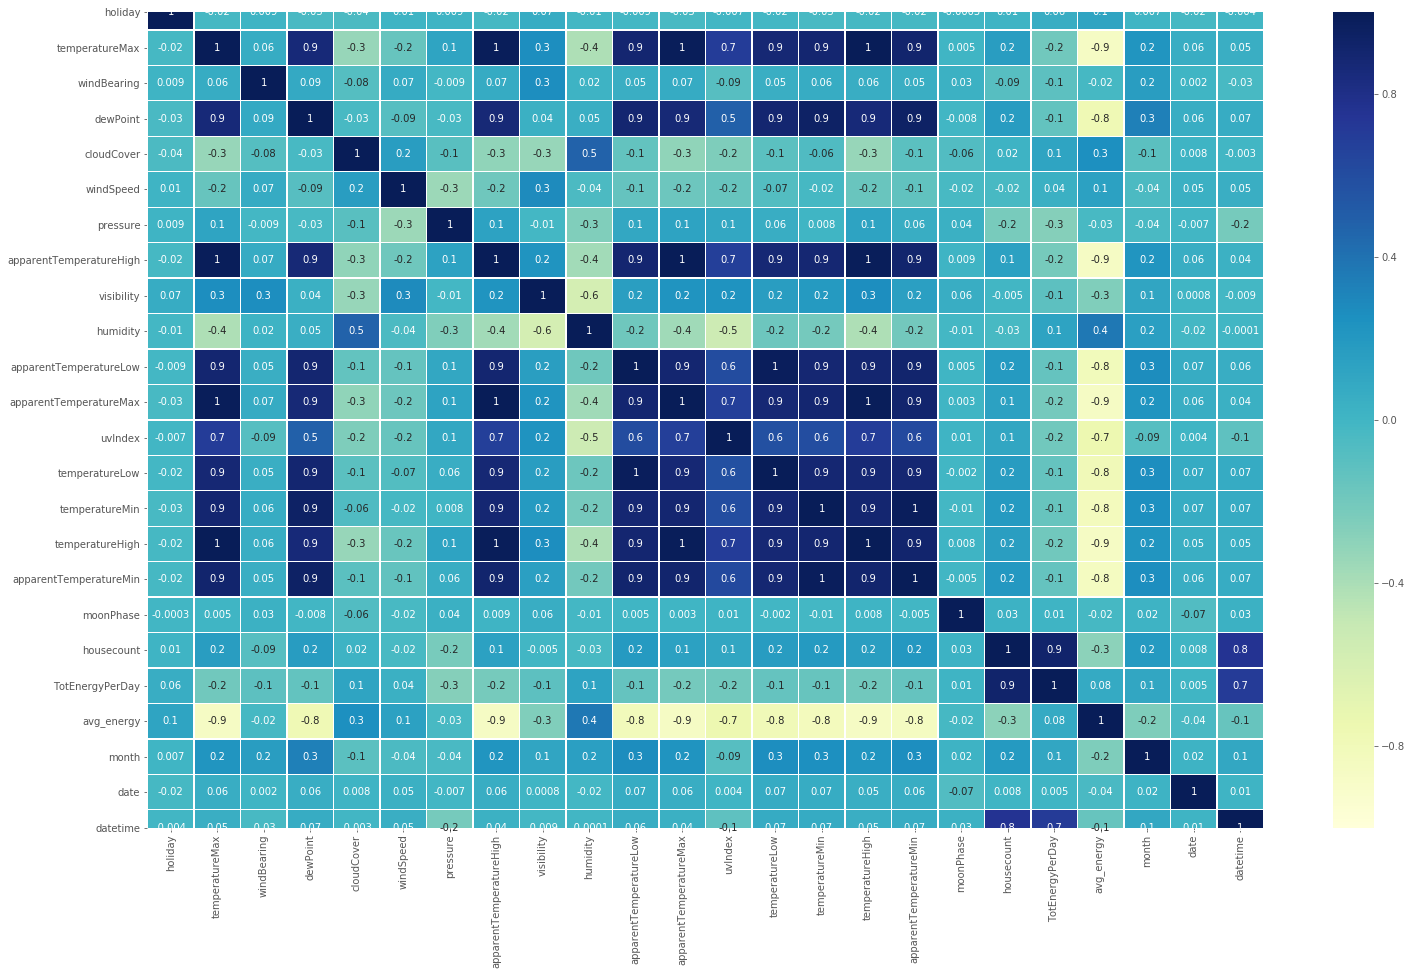

In [588]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(final_corr, cmap="YlGnBu", linewidths=0.3, annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, ax=ax)

In [589]:
final_corr.reset_index(inplace=True)

In [590]:
final_corr

,index,holiday,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,...,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,housecount,TotEnergyPerDay,avg_energy,month,date,datetime
0,holiday,1.000000,-0.021732,0.009395,-0.032419,-0.039599,0.009564,0.008527,-0.022878,0.067585,...,-0.028812,-0.020359,-0.017906,-0.000345,0.011977,0.055246,0.124938,0.006647,-0.023203,-0.003647
1,temperatureMax,-0.021732,1.000000,0.062938,0.865398,-0.333338,-0.153419,0.118296,0.986215,0.261321,...,0.896155,0.997840,0.911266,0.005095,0.165129,-0.189632,-0.865212,0.224715,0.055713,0.053330
2,windBearing,0.009395,0.062938,1.000000,0.091580,-0.084071,0.073574,-0.009124,0.072030,0.259255,...,0.063953,0.058382,0.052828,0.034956,-0.091335,-0.112784,-0.022722,0.168934,0.001561,-0.026907
3,dewPoint,-0.032419,0.865398,0.091580,1.000000,-0.025872,-0.092031,-0.027515,0.870629,0.043651,...,0.938801,0.862303,0.940476,-0.007559,0.177626,-0.135863,-0.771700,0.328262,0.057964,0.069664
4,cloudCover,-0.039599,-0.333338,-0.084071,-0.025872,1.000000,0.169220,-0.098619,-0.309840,-0.332863,...,-0.062109,-0.335212,-0.102976,-0.064122,0.018301,0.124467,0.251221,-0.108178,0.008256,-0.003440
5,windSpeed,0.009564,-0.153419,0.073574,-0.092031,0.169220,1.000000,-0.343990,-0.186159,0.280734,...,-0.022087,-0.161839,-0.132297,-0.024524,-0.023689,0.041546,0.145416,-0.040743,0.046538,0.051416
6,pressure,0.008527,0.118296,-0.009124,-0.027515,-0.098619,-0.343990,1.000000,0.138683,-0.009767,...,0.007557,0.129552,0.058901,0.041789,-0.222382,-0.271323,-0.027827,-0.038424,-0.007104,-0.211297
7,apparentTemperatureHigh,-0.022878,0.986215,0.072030,0.870629,-0.309840,-0.186159,0.138683,1.000000,0.232933,...,0.890593,0.989490,0.914020,0.009018,0.143216,-0.211139,-0.865428,0.225492,0.057827,0.036740
8,visibility,0.067585,0.261321,0.259255,0.043651,-0.332863,0.280734,-0.009767,0.232933,1.000000,...,0.191860,0.260022,0.152318,0.060627,-0.005388,-0.116004,-0.250314,0.112338,0.000805,-0.009391
9,humidity,-0.013943,-0.407432,0.020292,0.052355,0.480576,-0.041754,-0.251057,-0.369758,-0.579280,...,-0.207155,-0.412044,-0.201027,-0.013711,-0.029135,0.130475,0.372323,0.152554,-0.015212,-0.000140


# Feature Selection 

In [591]:
feature_list = [j for i, j in zip(final_corr["avg_energy"], final_corr["index"]) if abs(i) > 0.3]
feature_list

['temperatureMax',
 'dewPoint',
 'apparentTemperatureHigh',
 'humidity',
 'apparentTemperatureLow',
 'apparentTemperatureMax',
 'uvIndex',
 'temperatureLow',
 'temperatureMin',
 'temperatureHigh',
 'apparentTemperatureMin',
 'avg_energy']

## Save File to csv

In [592]:
final.to_csv("D:/mirge/data/final.csv", index=False)

In [593]:
final_columns = ['day','temperatureMax', 'dewPoint',
       'apparentTemperatureHigh', 'temperatureMin', 'temperatureLow', 
        'temperatureHigh', #'apparentTemperatureMin',
       'uvIndex', #'month', 'datetime' , 
       'avg_energy']

In [594]:
train = final[final["day"]<"2014-02-01"][final_columns]
test = final[final["day"]>="2014-02-01"][final_columns]
#train = final[final["day"]<"2014-02-01"][["day", "temperatureMax","uvIndex", "dewPoint", "windSpeed", "pressure","humidity","housecount","month","datetime","avg_energy"]]
#test = final[final["day"]>="2014-02-01"][["day", "apparentTempetatureMax", "temperatureM","uvIndex", "dewPoint", "windSpeed", "pressure","holiday","housecount","month","datetime","avg_energy"]]
train.to_csv("D:/mirge/data/train.csv", index=False)
test.to_csv("D:/mirge/data/test.csv", index=False)

# Accuracy Function

In [595]:
def accuracy_function(y, y_pred):
    yhat_lower = []
    yhat_upper = []
    y_bin = [1]*len(y)
    y_pred_bin = []
    for i in y:
        yhat_lower.append(i-0.6)
        yhat_upper.append(i+0.6)
    for i, j, k in zip(yhat_lower, yhat_upper, y_pred):
        if k< j and k>i:
            y_pred_bin.append(1)
        else:
            y_pred_bin.append(0)
    acc_score = accuracy_score(y_bin, y_pred_bin)
    return acc_score

## Initiating out_df

In [596]:
out_df = pd.DataFrame()
out_df["day"] = test["day"]
out_df.set_index("day", inplace=True)

# **Using fbprophet**

In [31]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot
from fbprophet.plot import plot_components
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
train = pd.read_csv("/kaggle/working/train.csv")
test = pd.read_csv("/kaggle/working/test.csv")
test["day"] = pd.to_datetime(test["day"])
train["day"] = pd.to_datetime(train["day"])
train_df = train[["day", "avg_energy"]]
train_df.columns = ["ds", "y"]
test_df = test[["day", "avg_energy"]]
test_df.columns = ["ds", "y"]
test_df_ans = test_df.copy()
test_df["y"] = 0

In [ ]:
train_df.shape, test_df.shape, test_df_ans.shape

## Initiation of  Prophet by Facebook

In [ ]:
fb_model = Prophet()
fb_model.add_seasonality(name="monthly", period=30, fourier_order=5)
fb_model.add_country_holidays(country_name='UK')
fb_model.fit(train_df)

In [ ]:
fb_model.train_holiday_names

In [ ]:
forecast = fb_model.predict(test_df)
forecast.head()

In [ ]:
out_df["fbprophet"] = forecast["yhat"]

In [ ]:
'''def accuracy_function(y_test ,y_pred):
    y_pred_bin=[]
    for i, j, k in zip(forecast["yhat_lower"], forecast["yhat_upper"], y_pred):
        if k < j and k > i:
            y_pred_bin.append(1)
        else:
            y_pred_bin.append(0)
    
    y_test_bin=[]
    for i, j, k in zip(forecast["yhat_lower"], forecast["yhat_upper"], y_test):
        if k < j and k > i:
            y_test_bin.append(1)
        else:
            y_test_bin.append(0)
    acc_score = accuracy_score(y_test_bin, y_pred_bin)
    return acc_score'''

In [ ]:
fig = plot(fb_model, forecast, figsize=(20, 7))
ax = fig.gca()
ax.set_title("Date vs energy_sum", size=25)
ax.set_xlabel("Date-->", size=15)
ax.set_ylabel("energy_sum", size=15)
ax.tick_params(axis="x", labelsize=15, rotation=45)
ax.tick_params(axis="y", labelsize=15)

In [ ]:
fig = plot_components(fb_model, forecast, figsize=(20, 10))
ax = fig.gca()
ax.tick_params(axis="x", labelsize=15, rotation=45)
ax.tick_params(axis="y", labelsize=15)

### Anlysis with cross_validation

In [ ]:
df_cv = cross_validation(fb_model, horizon="60 days")
df_cv.head()

### With performance_metrics, we can visualize the score

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
forecast["ds"].shape, forecast["yhat"].shape

In [ ]:
fig, ax1 = plt.subplots(figsize=(25, 6)) 
ax1.plot(test_df_ans["ds"], test_df_ans["y"], color="orange")
#ax1.plot(forecast["ds"], forecast["yhat"], color="blue")
ax1.plot(forecast["ds"], forecast["yhat_lower"], color="black")
ax1.plot(forecast["ds"], forecast["yhat_upper"], color="red")
ax1.legend(("y", "yhat_lower", "yhat_upper"))
# ax1.set_xlabel("days-->", fontsize=20)
# ax1.set_ylabel("energy_sum", fontsize=20)
# plt.xticks(rotation=45, fontsize=15)

# Apply RNN 

In [610]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [611]:
train = pd.read_csv("D:/mirge/data/train.csv")
test = pd.read_csv("D:/mirge/data/test.csv")
test.head()

,day,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex,avg_energy
0,2014-02-01,9.72,3.18,4.27,4.83,6.24,8.32,1.0,11.710582
1,2014-02-02,9.30,2.63,6.48,5.79,4.97,9.30,1.0,12.078164
2,2014-02-03,7.99,2.86,4.59,4.97,4.22,7.99,1.0,11.280011
3,2014-02-04,8.88,2.69,5.63,4.22,5.54,8.88,1.0,11.095584
4,2014-02-05,9.64,4.06,5.86,5.54,7.01,9.64,1.0,11.415105


In [612]:
train.set_index("day", inplace=True)
test.set_index("day", inplace=True)

In [613]:
X_train = train.drop(["avg_energy"], axis=1).iloc[:len(train)-27,:]
X_val = train.drop("avg_energy", axis=1).iloc[len(train)-27:,:]
y_train = train["avg_energy"][:len(train)-27,]
y_val = train["avg_energy"][len(train)-27:,]
X_test = test.drop("avg_energy", axis=1)
y_test = test["avg_energy"]

In [614]:
'''scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)'''

'scaler = MinMaxScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.fit_transform(X_test)'

In [615]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((771, 7), (771,), (27, 7), (27,), (28, 7), (28,))

In [616]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
#--------------------------------------------
X_val = np.array(X_val)
y_val = np.array(y_val)

In [619]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
#---------------------------------------------------------------------------------
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

In [620]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((771, 1, 7), (771,), (28, 1, 7), (28,))

### Normalization of X_train and X_test

In [621]:
'''X_test = tf.keras.utils.normalize(X_test, axis=1)
X_train = tf.keras.utils.normalize(X_train, axis=1)'''

'X_test = tf.keras.utils.normalize(X_test, axis=1)\nX_train = tf.keras.utils.normalize(X_train, axis=1)'

## Initialization of RNN LSTM

In [622]:
model = Sequential()

In [653]:
# design network

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units = 200, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.01))
model.add(tf.keras.layers.LSTM(units = 400, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.02))
model.add(tf.keras.layers.LSTM(units = 400, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.05))
model.add(tf.keras.layers.Dense(units = 10, activation="linear"))
model.add(tf.keras.layers.Dropout(0.01))
model.add(tf.keras.layers.Dense(1, activation="linear"))
model.compile(loss='mae', optimizer='adam')
es = EarlyStopping(monitor='mae', mode=100, verbose=4)
fit = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), callbacks=[es])


Train on 771 samples, validate on 27 samples
Epoch 1/500
771/771 [==============================] - 6s 8ms/sample - loss: 5.8206 - val_loss: 3.0753
Epoch 2/500
771/771 [==============================] - 1s 682us/sample - loss: 1.9343 - val_loss: 0.4575
Epoch 3/500
771/771 [==============================] - 0s 636us/sample - loss: 1.1066 - val_loss: 0.5058
Epoch 4/500
771/771 [==============================] - 0s 636us/sample - loss: 0.8711 - val_loss: 0.6268
Epoch 5/500
771/771 [==============================] - 1s 725us/sample - loss: 0.7607 - val_loss: 0.5726
Epoch 6/500
771/771 [==============================] - 0s 633us/sample - loss: 0.8218 - val_loss: 0.8952
Epoch 7/500
771/771 [==============================] - 0s 636us/sample - loss: 0.7560 - val_loss: 0.5208
Epoch 8/500
771/771 [==============================] - 0s 642us/sample - loss: 0.7290 - val_loss: 0.6621
Epoch 9/500
771/771 [==============================] - 0s 636us/sample - loss: 0.7332 - val_loss: 0.5556
Epoch 10/500

771/771 [==============================] - 1s 877us/sample - loss: 0.6371 - val_loss: 0.4560
Epoch 79/500
771/771 [==============================] - 1s 652us/sample - loss: 0.6092 - val_loss: 0.4956
Epoch 80/500
771/771 [==============================] - 0s 642us/sample - loss: 0.5941 - val_loss: 0.4004
Epoch 81/500
771/771 [==============================] - 0s 647us/sample - loss: 0.5788 - val_loss: 0.4968
Epoch 82/500
771/771 [==============================] - 0s 623us/sample - loss: 0.6392 - val_loss: 0.7517
Epoch 83/500
771/771 [==============================] - 0s 623us/sample - loss: 0.6514 - val_loss: 0.5747
Epoch 84/500
771/771 [==============================] - 1s 686us/sample - loss: 0.6027 - val_loss: 0.5097
Epoch 85/500
771/771 [==============================] - 0s 639us/sample - loss: 0.6235 - val_loss: 0.3819
Epoch 86/500
771/771 [==============================] - 1s 658us/sample - loss: 0.6377 - val_loss: 0.6977
Epoch 87/500
771/771 [==============================] - 1s 

Epoch 155/500
771/771 [==============================] - 0s 621us/sample - loss: 0.5924 - val_loss: 0.4056
Epoch 156/500
771/771 [==============================] - 0s 626us/sample - loss: 0.5796 - val_loss: 0.4463
Epoch 157/500
771/771 [==============================] - 0s 628us/sample - loss: 0.5657 - val_loss: 0.6533
Epoch 158/500
771/771 [==============================] - 0s 625us/sample - loss: 0.5930 - val_loss: 0.5427
Epoch 159/500
771/771 [==============================] - 1s 676us/sample - loss: 0.5684 - val_loss: 0.5711
Epoch 160/500
771/771 [==============================] - 0s 629us/sample - loss: 0.5793 - val_loss: 0.5059
Epoch 161/500
771/771 [==============================] - 0s 619us/sample - loss: 0.5712 - val_loss: 0.4125
Epoch 162/500
771/771 [==============================] - 0s 616us/sample - loss: 0.5831 - val_loss: 0.4517
Epoch 163/500
771/771 [==============================] - 0s 619us/sample - loss: 0.5923 - val_loss: 0.5780
Epoch 164/500
771/771 [==============

Epoch 308/500
771/771 [==============================] - 1s 698us/sample - loss: 0.5362 - val_loss: 0.3871
Epoch 309/500
771/771 [==============================] - 1s 654us/sample - loss: 0.5428 - val_loss: 0.4244
Epoch 310/500
771/771 [==============================] - 1s 651us/sample - loss: 0.5508 - val_loss: 0.3991
Epoch 311/500
771/771 [==============================] - 1s 658us/sample - loss: 0.5395 - val_loss: 0.4806
Epoch 312/500
771/771 [==============================] - 0s 643us/sample - loss: 0.5547 - val_loss: 0.5405
Epoch 313/500
771/771 [==============================] - 1s 659us/sample - loss: 0.5586 - val_loss: 0.4698
Epoch 314/500
771/771 [==============================] - 1s 668us/sample - loss: 0.5510 - val_loss: 0.3804
Epoch 315/500
771/771 [==============================] - 0s 630us/sample - loss: 0.5714 - val_loss: 0.4817
Epoch 316/500
771/771 [==============================] - 0s 632us/sample - loss: 0.5438 - val_loss: 0.4763
Epoch 317/500
771/771 [==============

771/771 [==============================] - 1s 676us/sample - loss: 0.5253 - val_loss: 0.4151
Epoch 461/500
771/771 [==============================] - 1s 654us/sample - loss: 0.5434 - val_loss: 0.4582
Epoch 462/500
771/771 [==============================] - 0s 617us/sample - loss: 0.5222 - val_loss: 0.5350
Epoch 463/500
771/771 [==============================] - 1s 649us/sample - loss: 0.5412 - val_loss: 0.6932
Epoch 464/500
771/771 [==============================] - 1s 677us/sample - loss: 0.5249 - val_loss: 0.5026
Epoch 465/500
771/771 [==============================] - 0s 608us/sample - loss: 0.5289 - val_loss: 0.4402
Epoch 466/500
771/771 [==============================] - 1s 654us/sample - loss: 0.5410 - val_loss: 0.6075
Epoch 467/500
771/771 [==============================] - 1s 706us/sample - loss: 0.5241 - val_loss: 0.5107
Epoch 468/500
771/771 [==============================] - 1s 698us/sample - loss: 0.5112 - val_loss: 0.5219
Epoch 469/500
771/771 [============================

In [644]:
y_train_pred = model.predict(X_train)
y_train_pred_rnn = np.reshape(y_train_pred, (y_train.shape[0]))

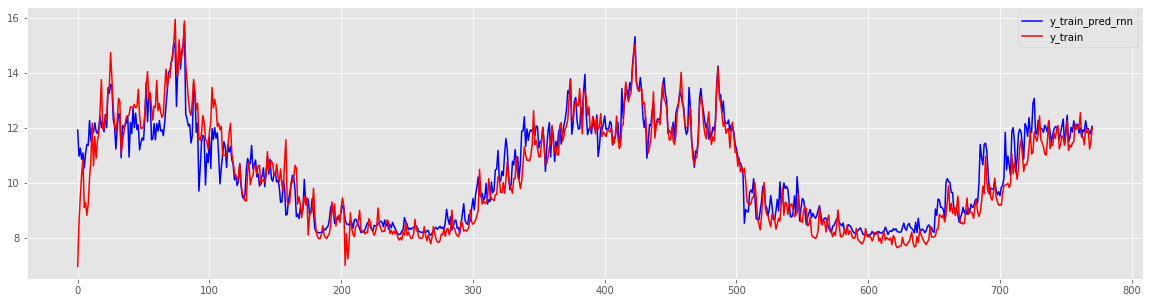

In [645]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(y_train_pred_rnn, color="blue")
ax1.plot(y_train, color="red")
ax1.legend(("y_train_pred_rnn", "y_train"))
plt.show()

In [646]:
y_test_pred = model.predict(X_test)
y_test_pred_rnn = np.reshape(y_test_pred, (y_test_pred.shape[0]))

In [647]:
out_df["rnn"] = y_test_pred_rnn

### Accuracy Score

In [648]:
accuracy_function(y_test, y_test_pred_rnn)

0.42857142857142855

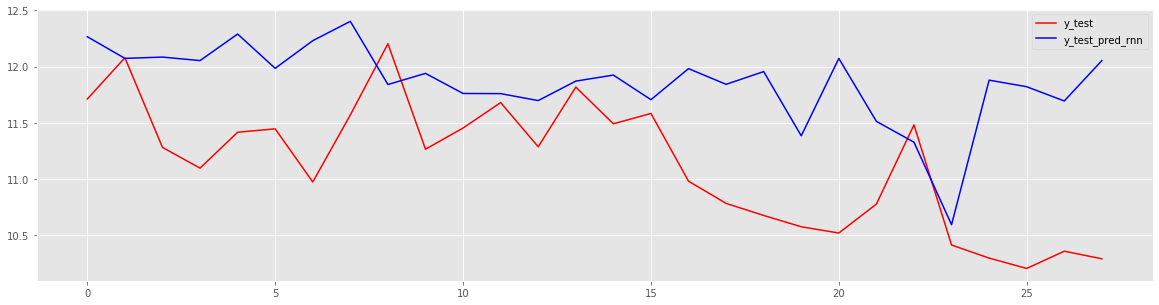

In [649]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_rnn, color="blue")
ax2.legend(("y_test", "y_test_pred_rnn"))
plt.show()

### Mean Squared Error

In [650]:
trainScore = mean_squared_error(y_train, y_train_pred_rnn)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_rnn)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.42 MSE
Test Score: 0.85 MSE


### Mean Absolute Error

In [651]:
trainScore = mean_absolute_error(y_train, y_train_pred_rnn)
print("trainScore : %.2f MAE" % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_rnn)
print("testScore : %.2f MAE" % (testScore))

trainScore : 0.46 MAE
testScore : 0.76 MAE


### Mean Absolute Percentage Error

In [641]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,y_test_pred_rnn)

5.2202749389409515

# Using XGBOOST

In [465]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [466]:
train = pd.read_csv("D:/mirge/data/train.csv")
test = pd.read_csv("D:/mirge/data/test.csv")
train.head()

,day,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex,month,datetime,avg_energy
0,2011-11-23,10.36,6.29,10.36,3.81,8.24,10.36,1.0,11,0,6.952692
1,2011-11-24,12.93,8.56,12.93,8.56,9.71,12.93,1.0,11,1,8.536480
2,2011-11-25,13.03,7.24,12.27,7.46,7.01,12.27,1.0,11,2,9.499781
3,2011-11-26,12.96,6.96,12.96,7.01,11.59,12.96,1.0,11,3,10.267707
4,2011-11-27,13.54,5.76,13.54,4.47,1.31,13.54,1.0,11,4,10.850805


split data into X_train, y_train, X_test and y_test form

In [467]:
# train.set_index("day", inplace=True)
# test.set_index("day", inplace=True)
# X_train = train.drop("avg_energy", axis=1)
# y_train = train["avg_energy"]
# X_test = test.drop("avg_energy", axis=1)
# y_test = test["avg_energy"]

In [468]:
train.set_index("day", inplace=True)
test.set_index("day", inplace=True)
X_train = train.drop(["avg_energy"], axis=1).iloc[:len(train)-27,:]
X_val = train.drop("avg_energy", axis=1).iloc[len(train)-27:,:]
y_train = train["avg_energy"][:len(train)-27,]
y_val = train["avg_energy"][len(train)-27:,]
X_test = test.drop("avg_energy", axis=1)
y_test = test["avg_energy"]

In [469]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((771, 9), (28, 9), (771,), (28,), (27, 9), (27,))

##  Initialization of an XGBoost Regressor

In [470]:
#xg_model = xgb.XGBRegressor(n_estimators=1000, learning_rate = 0.2, max_depth=3)
xg_model = xgb.XGBRegressor(learning_rate= 0.005, max_depth= 3, n_estimators= 1000, silent=1)

In [471]:
# lr_range = [0.001, 0.01, 0.1, 0.2,0.25, 0.3]
# n_est_range = [10,20,30,50,100]
# md_range = [2,4,6,8,10]
# algo_booster = ["gbtree", "gblinear"]

# parameters = dict(learning_rate=lr_range,
#                   n_estimators=n_est_range,
#                   max_depth=md_range,
#                   booster = algo_booster)

# from sklearn.model_selection import GridSearchCV
# reg_xgb = xgb.XGBRegressor(random_state=2020, silent=1)
# xg_search = GridSearchCV(reg_xgb, param_grid=parameters,
#                   cv=5,scoring='neg_mean_absolute_error')


In [472]:
# print(xg_model.best_params_)
# print(xg_model.best_score_)

In [473]:
xg_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=1, verbosity=1)

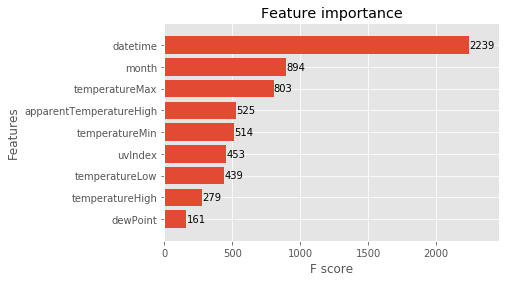

In [474]:
xgb.plot_importance(xg_model, height=0.8)

# Forecast on Test Set

In [475]:
y_train_pred_xg = xg_model.predict(X_train)

In [476]:
y_test_pred_xg = xg_model.predict(X_test)

In [477]:
out_df["xg"] = y_test_pred_xg

In [478]:
accuracy_function(y_test, y_test_pred_xg)

0.6428571428571429

## Mean squared error

In [479]:
trainScore = mean_squared_error(y_train, y_train_pred_xg)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_xg)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.17 MSE
Test Score: 0.42 MSE


## Mean absolute error

In [480]:
trainScore = mean_absolute_error(y_train, y_train_pred_xg)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_xg)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.31 MAE
Test Score: 0.54 MAE


## Mean Absolute Percentage Error

In [481]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,y_test_pred_xg)

4.981991676050473

## Actual vs Predicted

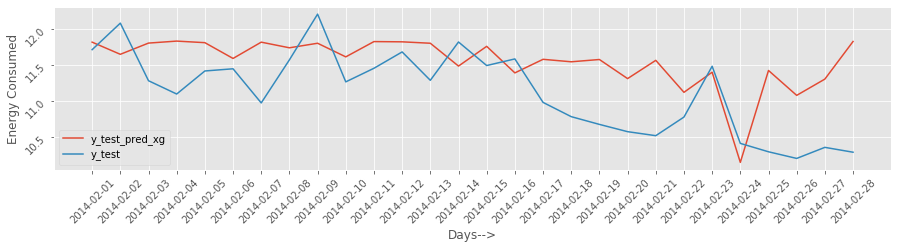

In [482]:
fig, ax1 = plt.subplots(figsize=(15,3))
ax1.plot(y_test_pred_xg, label='data')
ax1.plot(y_test, label='prediction')
ax1.set_xlabel('Days-->')
ax1.set_ylabel('Energy Consumed')
ax1.legend(("y_test_pred_xg", "y_test"))
ax1.tick_params(rotation=45)
# plt.legend()


# Gradient Boosting Regressor

In [484]:
from sklearn.ensemble import GradientBoostingRegressor

## Initialization of GradientBoostingRegressor

In [485]:
reg = GradientBoostingRegressor(random_state=2020,learning_rate= 0.6, 
                                max_depth= 5, min_samples_leaf= 10, min_samples_split= 9, 
                                n_estimators= 50)
reg.fit(X_train,y_train)
y_train_pred_grad = reg.predict(X_train)
y_test_pred_grad = reg.predict(X_test)

In [486]:
out_df["grad"] = y_test_pred_grad

### Accuracy Score

In [487]:
accuracy_function(y_test, y_test_pred_grad)

0.5714285714285714

### Mean Squared Error

In [488]:
trainScore = mean_squared_error(y_train, y_train_pred_grad)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_grad)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.02 MSE
Test Score: 0.68 MSE


### Mean Absolute Error

In [489]:
trainScore = mean_absolute_error(y_train, y_train_pred_grad)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_grad)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.10 MAE
Test Score: 0.65 MAE


### y_test vs y_test_pred_grad

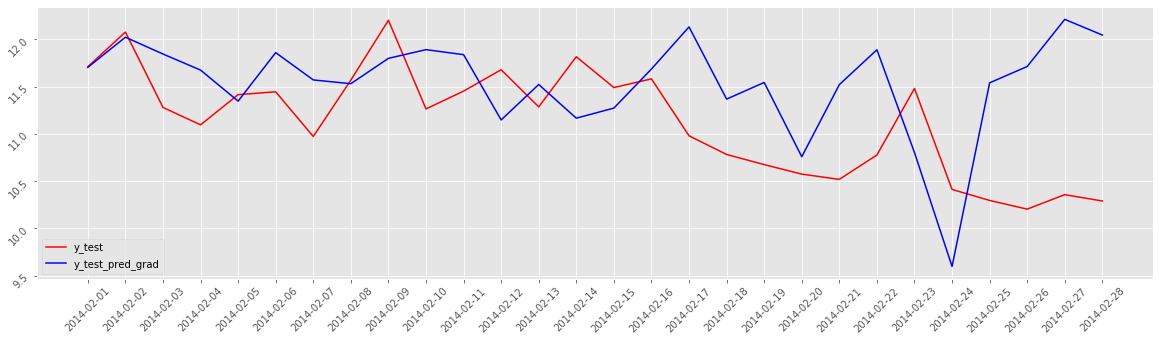

In [490]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_grad, color="blue")
ax2.legend(("y_test", "y_test_pred_grad"))
ax2.tick_params(rotation=45)
plt.show()

# Random Forest Tree

In [491]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

### Instantiation of Random Forest Regressor

In [492]:
ran_reg = RandomForestRegressor(random_state=2020)
ran_reg.fit(X_train, y_train)
y_test_pred_ran = ran_reg.predict(X_test)
y_train_pred_ran = ran_reg.predict(X_train)

### accuracy score

In [493]:
accuracy_function(y_test, y_test_pred_ran)

0.4642857142857143

In [494]:
trainScore = mean_squared_error(y_train, y_train_pred_ran)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_ran)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.03 MSE
Test Score: 0.51 MSE


### Mean Absolute Error

In [495]:
trainScore = mean_absolute_error(y_train, y_train_pred_ran)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_ran)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.13 MAE
Test Score: 0.60 MAE


In [496]:
out_df["random"] = y_test_pred_ran

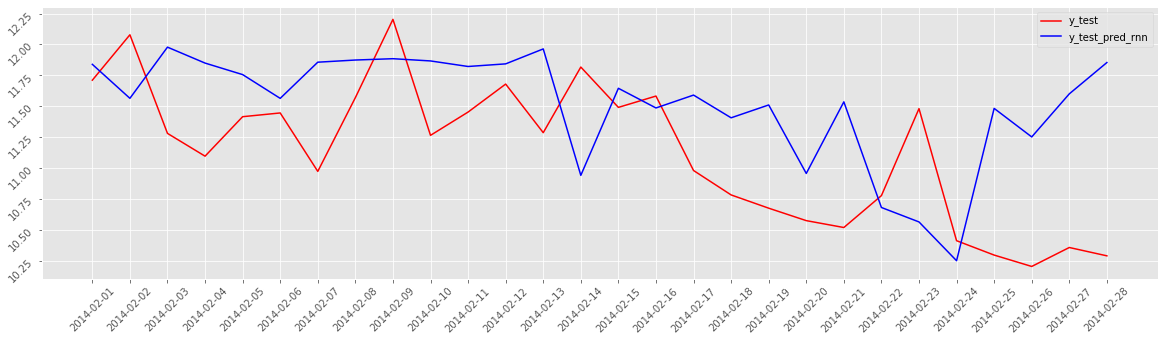

In [497]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_ran, color="blue")
ax2.legend(("y_test", "y_test_pred_rnn"))
ax2.tick_params(rotation=45)
plt.show()

# Linear Regression

In [498]:
from sklearn.linear_model import LinearRegression

In [499]:
train = pd.read_csv("D:/mirge/data/train.csv")
test = pd.read_csv("D:/mirge/data/test.csv")
train.head()

,day,temperatureMax,dewPoint,apparentTemperatureHigh,temperatureMin,temperatureLow,temperatureHigh,uvIndex,month,datetime,avg_energy
0,2011-11-23,10.36,6.29,10.36,3.81,8.24,10.36,1.0,11,0,6.952692
1,2011-11-24,12.93,8.56,12.93,8.56,9.71,12.93,1.0,11,1,8.536480
2,2011-11-25,13.03,7.24,12.27,7.46,7.01,12.27,1.0,11,2,9.499781
3,2011-11-26,12.96,6.96,12.96,7.01,11.59,12.96,1.0,11,3,10.267707
4,2011-11-27,13.54,5.76,13.54,4.47,1.31,13.54,1.0,11,4,10.850805


In [500]:
train.set_index("day", inplace=True)
test.set_index("day", inplace=True)
X_train = train.drop(["avg_energy"], axis=1)
y_train = train["avg_energy"]
X_test = test.drop(["avg_energy"], axis=1)
y_test = test["avg_energy"]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((798, 9), (798,), (28, 9), (28,))

### Instantiation of LinearRegression

In [501]:
lin_reg = LinearRegression(normalize=0.2)
lin_reg.fit(X_train, y_train)
y_train_pred_reg = lin_reg.predict(X_train)
y_test_pred_reg = lin_reg.predict(X_test)

In [502]:
out_df["linear"] = y_test_pred_reg

### accuracy score

In [503]:
accuracy_function(y_test, y_test_pred_reg)

0.6785714285714286

### Mean Squared Error

In [504]:
trainScore = mean_squared_error(y_train, y_train_pred_reg)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_reg)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.52 MSE
Test Score: 0.39 MSE


### Mean Absolute Error

In [505]:
trainScore = mean_absolute_error(y_train, y_train_pred_reg)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_reg)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.55 MSE
Test Score: 0.53 MSE


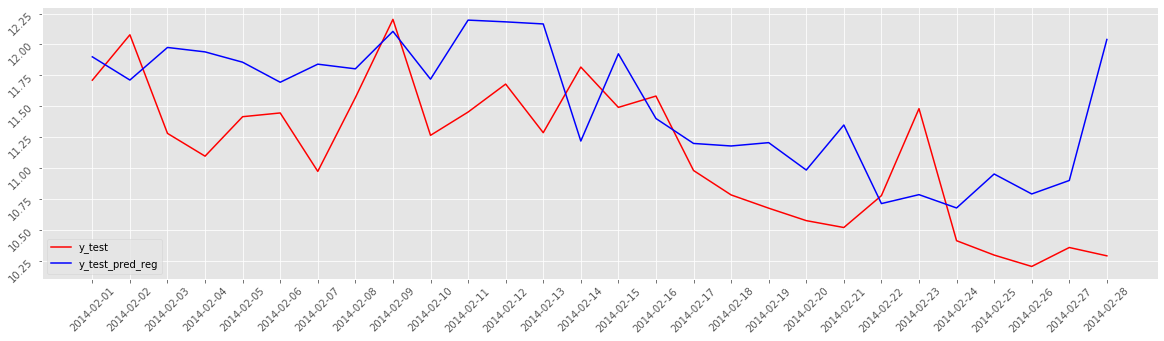

In [506]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_reg, color="blue")
ax2.legend(("y_test", "y_test_pred_reg"))
ax2.tick_params(rotation=45)
plt.show()

# SUPPORT VECTOR MACHINE

In [507]:
from sklearn.svm import SVR

### Instantiation of Support Vector Regressor

In [508]:
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_train_pred_svm = svm_reg.predict(X_train)
y_test_pred_svm = svm_reg.predict(X_test)

In [509]:
out_df["svm"] = y_test_pred_svm

### accuracy score

In [510]:
accuracy_function(y_test, y_test_pred_svm)

0.5

### Mean Squared Error

In [511]:
trainScore = mean_squared_error(y_train, y_train_pred_svm)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_svm)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 1.16 MSE
Test Score: 0.83 MSE


### Mean Absolute Error

In [512]:
trainScore = mean_absolute_error(y_train, y_train_pred_svm)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_svm)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.85 MAE
Test Score: 0.74 MAE


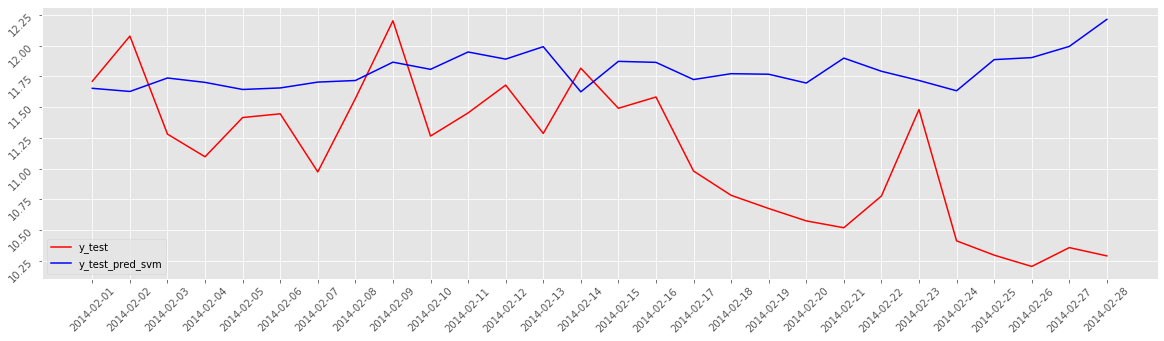

In [513]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_test_pred_svm, color="blue")
ax2.legend(("y_test", "y_test_pred_svm"))
ax2.tick_params(rotation=45)
plt.show()

# SARIMAX

In [514]:
#pip install pmdarima

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
from sklearn.metrics import r2_score
import statsmodels.api as sm
from pmdarima.arima import auto_arima

In [516]:
#train = pd.read_csv("/kaggle/working/train.csv")
#test = pd.read_csv("/kaggle/working/test.csv")
final = pd.read_csv("D:/mirge/datawarehouse/dfdata.csv")

In [102]:
#train.head()
# sari_columns = ['temperatureMax', 'dewPoint',#'weather_cluster',
       
#        'temperatureMin',
#        'uvIndex', 'temperatureLow', 
#        'temperatureHigh', 
#        'avg_energy']#, 'month', 'datetime'

In [517]:
final.rename(columns = {"AvgEnergyPerDay":"avg_energy"}, inplace=True)

In [518]:
final.drop(["month","date"],axis=1,inplace=True)

In [519]:
final.head()

,day,holiday,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,housecount,TotEnergyPerDay,avg_energy
0,2011-11-23,0,10.36,229.0,6.29,0.36,2.04,1027.12,10.36,8.06,...,10.36,1.0,8.24,3.81,10.36,2.18,0.94,13,90.385000,6.952692
1,2011-11-24,0,12.93,204.0,8.56,0.41,4.04,1027.22,12.93,10.64,...,12.93,1.0,9.71,8.56,12.93,7.01,0.97,25,213.412000,8.536480
2,2011-11-25,0,13.03,243.0,7.24,0.48,5.02,1024.47,12.27,12.38,...,13.03,1.0,7.01,7.46,12.27,4.84,0.01,32,303.993000,9.499781
3,2011-11-26,1,12.96,237.0,6.96,0.44,5.75,1025.80,12.96,13.07,...,12.96,1.0,11.59,7.01,12.96,4.69,0.05,41,420.976000,10.267707
4,2011-11-27,1,13.54,256.0,5.76,0.42,5.48,1021.11,13.54,13.08,...,13.54,1.0,1.31,4.47,13.54,2.94,0.08,41,444.883001,10.850805


In [520]:
final.columns

Index(['day', 'holiday', 'temperatureMax', 'windBearing', 'dewPoint',
       'cloudCover', 'windSpeed', 'pressure', 'apparentTemperatureHigh',
       'visibility', 'humidity', 'apparentTemperatureLow',
       'apparentTemperatureMax', 'uvIndex', 'temperatureLow', 'temperatureMin',
       'temperatureHigh', 'apparentTemperatureMin', 'moonPhase', 'housecount',
       'TotEnergyPerDay', 'avg_energy'],
      dtype='object')

In [521]:
# scaler = MinMaxScaler()
# train_scaled = scaler.fit_transform(train)
# train_scaled_df = pd.DataFrame(train_scaled)
# train_scaled_df.head()

# Dickey Fuller's Test

ADF-test(Original-time-series)

For Average Energy Per Day

When Original-data is not stationary and Differenced-data is stationary,the time series is called unit root process.

For unit root process, we use ARIMA or SARIMA model. From results, we decided that Original time series is not stationary

H0 : Data is not stationary H1 : Data is stationary

If p is greater than 0.05 then data is not stationary

What is adfuller method parameter 'regression'?

’c’ : constant only (default) ’ct’ : constant and trend ’ctt’ : constant, and linear and quadratic trend ’nc’ : no constant, no trend

ADF-test(differenced-time-series)


In [522]:
t = sm.tsa.adfuller(final["avg_energy"], autolag='AIC',regression='ct')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -1.962308
p-value                          0.621806
#Lags Used                      21.000000
Number of Observations Used    804.000000
dtype: float64

Data is not stationary so apply resampling of train dataset

In [523]:
final["day"] = pd.to_datetime(final["day"])
final.set_index("day", inplace=True)
final_sample = final.resample("W").mean()
final_sample.head()

,holiday,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,housecount,TotEnergyPerDay,avg_energy
day,,,,,,,,,,,,,,,,,,,,,
2011-11-27,0.400000,12.564000,233.800000,6.962000,0.422000,4.466000,1025.144000,12.412000,11.446000,0.828000,...,12.564000,1.000000,7.572000,6.262000,12.412000,4.332000,0.410000,30.400000,294.729800,9.221493
2011-12-04,0.285714,11.238571,223.714286,5.752857,0.465714,4.078571,1010.838571,10.167143,12.508571,0.822857,...,10.497143,1.000000,6.468571,5.067143,10.807143,2.790000,0.217143,86.571429,877.449143,9.929826
2011-12-11,0.285714,8.291429,242.285714,2.185714,0.320000,5.300000,1009.545714,5.360000,12.801429,0.784286,...,5.397143,1.000000,3.044286,2.721429,8.291429,-0.922857,0.431429,166.142857,1989.198000,11.834351
2011-12-18,0.285714,7.330000,257.857143,2.008571,0.410000,4.707143,999.557143,2.805714,12.318571,0.818571,...,4.281429,1.000000,2.330000,2.475714,6.594286,-1.271429,0.662857,249.428571,3235.645572,12.889940
2011-12-25,0.285714,10.117143,253.285714,5.790000,0.570000,4.182857,1020.912857,8.721429,12.175714,0.862857,...,8.860000,0.571429,7.475714,5.135714,9.980000,1.947143,0.777143,355.571429,4500.322001,12.677327


In [110]:
t = sm.tsa.adfuller(final_sample["avg_energy"], autolag='AIC',regression='ct')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -4.687410
p-value                          0.000733
#Lags Used                      11.000000
Number of Observations Used    107.000000
dtype: float64

In [524]:
final_sample.shape

(119, 21)

In [525]:
train = final_sample[:(len(final_sample)-4)]
test = final_sample[len(final_sample)-4:]

In [526]:
len(train), len(test)

(115, 4)

# Seasonal Decompose
We use statsmodel for seasonal decompose as an additive model and the frequency of the time series which is the periodicity of the data which is 52 for weekly data.
Additive model = Trend + Seasonality + Random Noise

We can use an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 100 units of energy production). A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of energy production everyyear).

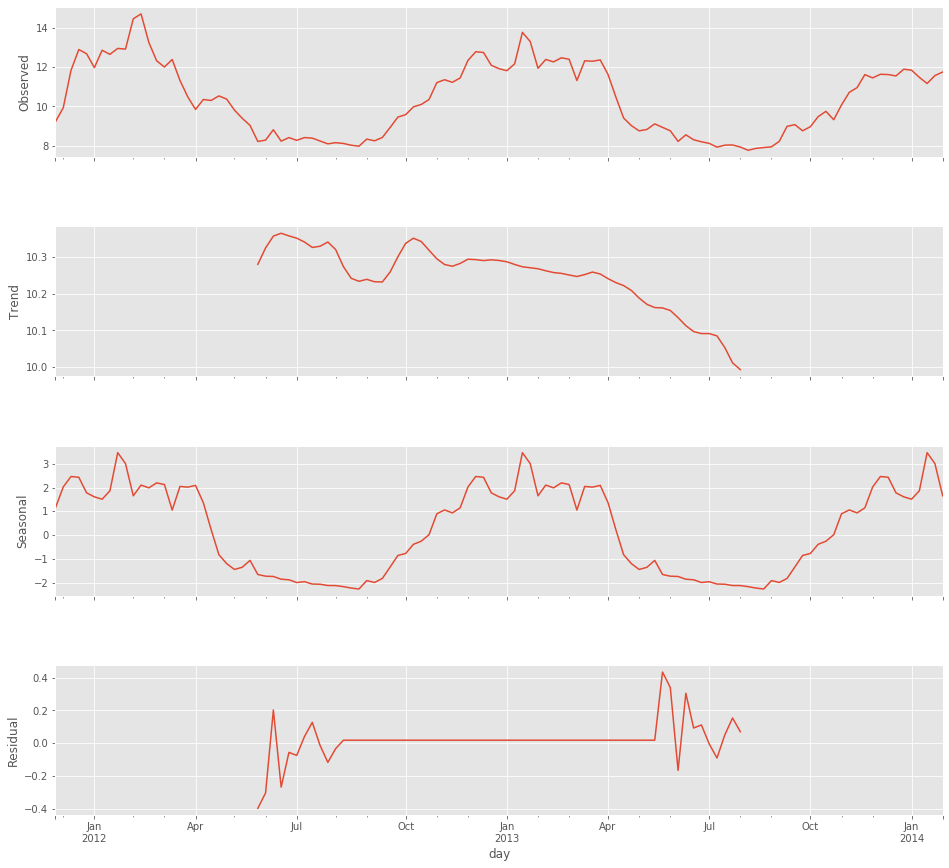

In [527]:
seas_d=sm.tsa.seasonal_decompose(train['avg_energy'],model="additive",freq=52)
fig=seas_d.plot()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [528]:
X_train=train.drop("avg_energy", axis=1)
y_train=train["avg_energy"]
X_test=test.drop("avg_energy", axis=1)
y_test=test["avg_energy"]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((115, 20), (4, 20), (115,), (4,))

In [529]:
model = auto_arima(y_train, exogenous=X_train, start_p=1, start_q=1, max_p=3, max_q=3, m=52,
                    seasonal=True,trace=True, error_action='ignore', suppress_warnings=True,
                    stepwise=True)

Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=185.108, BIC=245.496, Fit time=0.236 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 52); AIC=122.008, BIC=187.887, Fit time=9.811 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=614.775, BIC=672.419, Fit time=0.208 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 52); AIC=125.340, BIC=188.474, Fit time=0.472 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 52); AIC=125.620, BIC=194.244, Fit time=38.174 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 52); AIC=nan, BIC=nan, Fit time=n

In [530]:
model.aic()

122.00826891678297

In [531]:
model_order = model.order
model_seasonal_order = model.seasonal_order
#model_order = (0, 1, 1)
#model_seasonal_order = (0, 0, 0, 52)

In [532]:
model_sarimax = sm.tsa.statespace.SARIMAX(endog = y_train,order=model_order,
                                          seasonal_order=model_seasonal_order, 
                                          exog = X_train,enforce_stationarity=False, 
                                          enforce_invertibility=False)

In [533]:
model_fit = model_sarimax.fit()

In [534]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         avg_energy   No. Observations:                  115
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 52)   Log Likelihood                  -5.784
Date:                            Sat, 01 Feb 2020   AIC                             57.568
Time:                                    17:09:15   BIC                            106.492
Sample:                                11-27-2011   HQIC                            76.777
                                     - 02-02-2014                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
holiday                    -0.4615      1.222     -0.378      0.706      -2.857       1.934
temperatureMax             -1.0034      0.489     -2.050      0.040      -1.963      -0.044
windBearing                 0.0010      0.001      1.020      0.308      -0.001       0.003
dewPoint                   -0.3188      0.254     -1.253      0.210      -0.818       0.180
cloudCover                 -0.8417      1.188     -0.708      0.479      -3.171       1.488
windSpeed                  -0.0325      0.101     -0.323      0.747      -0.230       0.165
pressure                    0.0090      0.007      1.357      0.175      -0.004       0.022
apparentTemperatureHigh    -0.9190      0.344     -2.675      0.007      -1.592      -0.246
visibility                 -0.0358      0.104     -0.345      0.730      -0.239       0.168
humidity                    4.6639      5.356      0.871      0.384      -5.834      15.162
apparentTemperatureLow      0.0320      0.296      0.108      0.914      -0.549       0.613
apparentTemperatureMax      0.7349      0.326      2.255      0.024       0.096       1.374
uvIndex                    -0.1714      0.144     -1.189      0.234      -0.454       0.111
temperatureLow              0.1170      0.393      0.298      0.766      -0.653       0.887
temperatureMin              0.2350      0.316      0.744      0.457      -0.384       0.854
temperatureHigh             1.1421      0.562      2.032      0.042       0.041       2.244
apparentTemperatureMin     -0.1082      0.285     -0.379      0.705      -0.668       0.451
moonPhase                   0.1376      0.348      0.395      0.693      -0.545       0.820
housecount                 -0.0010      0.001     -1.344      0.179      -0.003       0.000
TotEnergyPerDay          8.039e-05   4.63e-05      1.735      0.083   -1.04e-05       0.000
ar.L1                       0.6076      0.230      2.639      0.008       0.156       1.059
ar.S.L52                   -0.1612      0.241     -0.668      0.504      -0.634       0.311
sigma2                      0.0875      0.031      2.842      0.004       0.027       0.148
===================================================================================
Ljung-Box (Q):                       36.92   Jarque-Bera (JB):                 2.61
Prob(Q):                              0.61   Prob(JB):                         0.27
Heteroskedasticity (H):               0.32   Skew:                             0.48
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [536]:
print(max(X_train.index.date))
print(min(X_train.index.date))

2014-02-02
2011-11-27


In [537]:
y_train_pred_sarimax = model_fit.predict(start=min(X_train.index.date), end=max(X_train.index.date),exog = X_train)
y_train_pred_sarimax.head()

day
2011-11-27    11.357168
2011-12-04     9.954792
2011-12-11    11.588831
2011-12-18    12.623994
2011-12-25    12.168687
Freq: W-SUN, dtype: float64

In [538]:
y_test_pred_sarimax = model_fit.predict(start=min(X_test.index.date), end=max(X_test.index.date),exog = X_test)
y_test_pred_sarimax.head()

2014-02-09    11.832644
2014-02-16    11.606647
2014-02-23    10.844117
2014-03-02    10.597190
Freq: W-SUN, dtype: float64

In [539]:
forecast=model_fit.forecast(steps='2014-03-02', exog=X_test)

## r2 score for train and test dataset

In [540]:
r2_score(y_train, y_train_pred_sarimax)

0.9624280756307297

In [541]:
r2_score(y_test, y_test_pred_sarimax)

0.7280173163204507

## Mean Squared Error

In [542]:
trainScore = mean_squared_error(y_train, y_train_pred_sarimax)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, y_test_pred_sarimax)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.12 MSE
Test Score: 0.06 MSE


In [543]:
trainScore = mean_absolute_error(y_train, y_train_pred_sarimax)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(y_test, y_test_pred_sarimax)
print('Test Score: %.2f MAE' % (testScore))

Train Score: 0.25 MAE
Test Score: 0.20 MAE


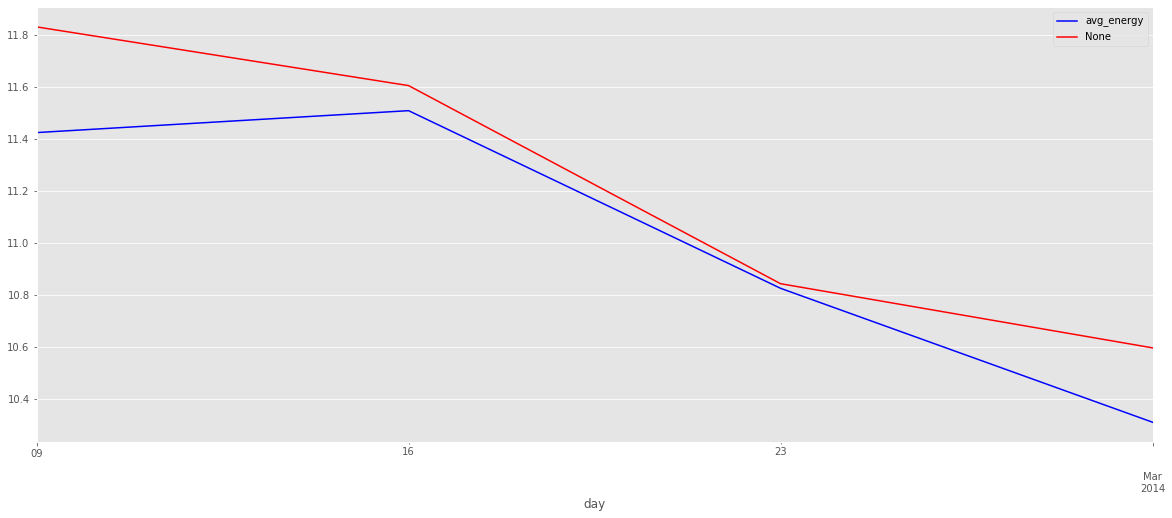

In [544]:
y_test.plot(figsize=(20,8), legend=True, color='blue')
y_test_pred_sarimax.plot(legend=True, color='red', figsize=(20,8))

# MEAN OF ALL OUTPUT

In [545]:
out_df.head()

,rnn,xg,grad,random,linear,svm
day,,,,,,
2014-02-01,11.749216,11.814595,11.704453,11.838883,11.899753,11.652988
2014-02-02,11.676964,11.646103,12.023656,11.563849,11.711742,11.627325
2014-02-03,11.807719,11.801696,11.845610,11.978072,11.975480,11.736910
2014-02-04,11.749788,11.829263,11.675498,11.849086,11.939624,11.701206
2014-02-05,11.651802,11.807492,11.346656,11.755850,11.856082,11.643560


In [557]:
out_df.reset_index("day", inplace=True)

In [566]:
#out_df.drop("svm", axis=1, inplace=True)
#out_df.head()
out_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
day       28 non-null datetime64[ns]
rnn       28 non-null float32
xg        28 non-null float32
grad      28 non-null float64
random    28 non-null float64
linear    28 non-null float64
svm       28 non-null float64
dtypes: datetime64[ns](1), float32(2), float64(4)
memory usage: 1.4 KB


In [558]:
def final_output(df):
    
    
    y_out_pred = df.mean(axis=1)
    
    return y_out_pred

y_out_pred = final_output(out_df[["rnn", "xg", "grad", "random", "linear", "svm"]])
y_out_pred.head()

0    11.776648
1    11.708273
2    11.857581
3    11.790744
4    11.676907
dtype: float64

In [559]:
test = pd.read_csv("D:/mirge/data/test.csv")
y_test = test["avg_energy"]

In [560]:
y_test.shape, y_out_pred.shape

((28,), (28,))

In [561]:
accuracy_function(y_test, y_out_pred)

0.6071428571428571

### Mean Squared Error

In [562]:
testScore = mean_squared_error(y_test, y_out_pred)
print('Test Score: %.2f MSE' % (testScore))

Test Score: 0.49 MSE


### Mean Absolute Error

In [563]:
testScore = mean_absolute_error(y_test, y_out_pred)
print('Test Score: %.2f MSE' % (testScore))

Test Score: 0.57 MSE


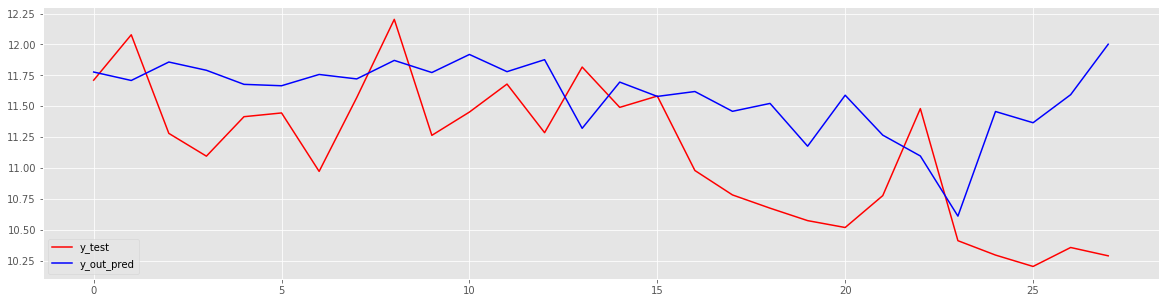

In [568]:
fig, ax2 = plt.subplots(figsize = (20,5))
ax2.plot(y_test, color="red")
ax2.plot(y_out_pred, color="blue")
ax2.legend(("y_test", "y_out_pred"))
#ax2.tick_params(rotation=45)
plt.show()